<a href="https://colab.research.google.com/github/iotanalytics/IoTTutorial/blob/main/code/preprocessing_and_decomposition/Singular_Spectrum_Analysis_(SSA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Singular Spectrum Analysis (SSA)

##Introduction
Source: https://pyts.readthedocs.io/en/stable/auto_examples/decomposition/plot_ssa.html

Signals such as time series can be seen as a sum of different signals such as trends and noise. Decomposing time series into several time series can be useful in order to keep the most important information. One decomposition algorithm is Singular Spectrum Analysis. This example illustrates the decomposition of a time series into several subseries using this algorithm and visualizes the different subseries extracted. It is implemented as pyts.decomposition.SingularSpectrumAnalysis.

##Code Example

In [ ]:
!pip install pyts

     |████████████████████████████████| 2.5MB 13.6MB/s 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyts.decomposition import SingularSpectrumAnalysis


In [ ]:
## example data importing
data = pd.read_csv('https://raw.githubusercontent.com/iotanalytics/IoTTutorial/main/data/SCG_data.csv').drop('Unnamed: 0',1).to_numpy()[0:20,:1000]

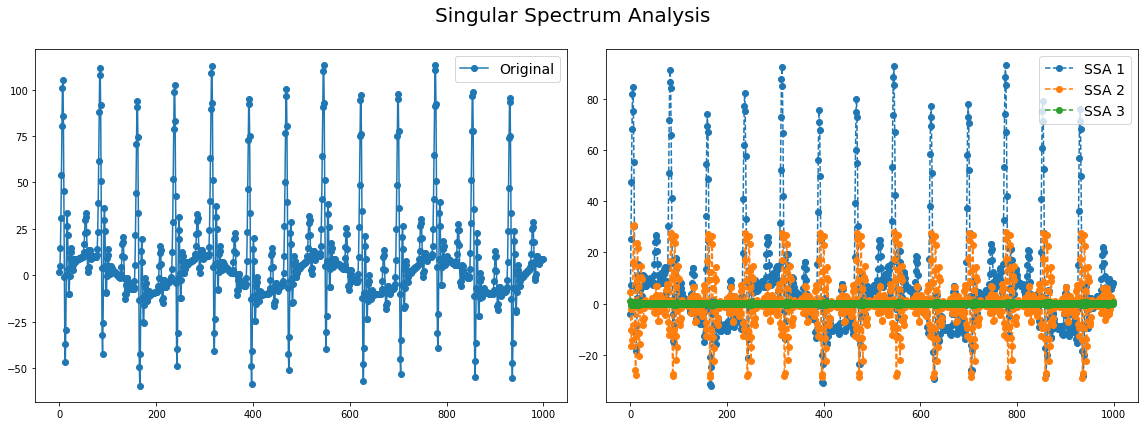

In [ ]:
# Author: Johann Faouzi <johann.faouzi@gmail.com>
# License: BSD-3-Clause



# # Parameters
# n_samples, n_timestamps = 100, 48

# # Toy dataset
# rng = np.random.RandomState(41)
# X = rng.randn(n_samples, n_timestamps)

# We decompose the time series into three subseries
window_size = 15
groups = [np.arange(i, i + 5) for i in range(0, 11, 5)]

# Singular Spectrum Analysis
ssa = SingularSpectrumAnalysis(window_size=25, groups=groups)
X_ssa = ssa.fit_transform(data)

# Show the results for the first time series and its subseries
plt.figure(figsize=(16, 6))

ax1 = plt.subplot(121)
ax1.plot(data[0], 'o-', label='Original')
ax1.legend(loc='best', fontsize=14)

ax2 = plt.subplot(122)
for i in range(len(groups)):
    ax2.plot(X_ssa[0, i], 'o--', label='SSA {0}'.format(i + 1))
ax2.legend(loc='best', fontsize=14)

plt.suptitle('Singular Spectrum Analysis', fontsize=20)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

# The first subseries consists of the trend of the original time series.
# The second and third subseries consist of noise.